# The Tent Map and the Cantor Set

## Goals

This notebook:

1. Introduces the use of SageMath for working with dynamical systems, by going carefully through an example that you have presumably already seen in some form. 
2. Illustrates in a special case how fractals arise from symmetries of a dynamical system (giving a special case of renormalization)
3. Introduces iterated function systems.

## Definition and plotting

You have probably seen variants of the Tent Map in the first dynamics course. Here we'll consider the map $T:{\mathbb R} \to {\mathbb R}$ given by 
$$T(x) = \begin{cases}
3x & \text{if $x \leq \frac{1}{2}$,}\\
3-3x & \text{if $x \geq \frac{1}{2}$.}
\end{cases}$$

This function can be coded in SageMath as follows:

In [1]:
# Define T to be a piecewise function
def T(x):
    if x <= 1/2:
        return 3*x
    else:
        return 3 - 3*x

*Remark:* Sage is built on top of Python and so the code above will run just as well in Python. The code returns $3x$ if $x \leq 1/2$ and returns $3-3x$ otherwise.

Sage then can do exact arithmetic to apply the map. For example, it shows $T(\frac{4}{5})=\frac{3}{5}$:

In [2]:
T(4/5)

3/5

We can plot the function below. (See the Sage documentaton of the [plot function](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html). You can see the documentation when running Sage by typing `plot?` and pressing `Shift+Return`.)

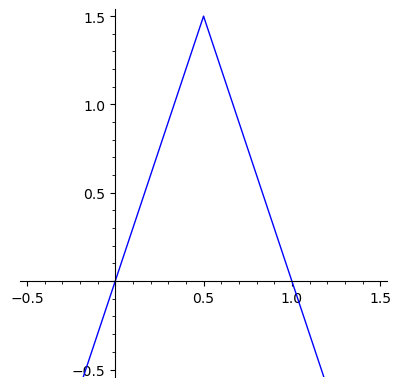

In [3]:
plot(T, xmin = -0.5, xmax = 1.5, ymin=-0.5, aspect_ratio = 1)

As we are studying dynamics, we are interested in understanding the long term behavior of orbits of the system. One obvious phenomenon is 

* If $x<0$, then $T^n(x) \to -\infty$ as $n \to \infty$. 

E.g., consider the orbit of $y_0 = -\frac{1}{2}$:

In [4]:
y0 = -1/2
y = y0
# Iterate over the values n = 0, ..., 9.
for n in range(10):
    print(f'T^{n}(y_0) = {y}')
    y = T(y)

T^0(y_0) = -1/2
T^1(y_0) = -3/2
T^2(y_0) = -9/2
T^3(y_0) = -27/2
T^4(y_0) = -81/2
T^5(y_0) = -243/2
T^6(y_0) = -729/2
T^7(y_0) = -2187/2
T^8(y_0) = -6561/2
T^9(y_0) = -19683/2


We consider when the orbit $\{T^n(x): ~n \geq 0\}$ is bounded.

Next observe that if $x>1$ then $T(x)<0$, so:

* If $x>1$, then $T^n(x) \to -\infty$ as $n \to \infty$. 

It follows that any point with a bounded orbit lies in $[0, 1]$. So, furthermore, the set of points with a bounded orbit is the set

$$\Lambda = \{x \in {\mathbb R}:~\text{$T^n(x) \in [0,1]$ for all $n \geq 0$}\}.$$

## The Cantor set

It is a well known-secret that $\Lambda$ is the middle-third Cantor set in $[0, 1]$ is the set of all points $x$ with bounded orbits. We draw the middle third Cantor set below using the dynamics of $T$.

Below, we write a function that returns the number of iterates that a point stays within $[0, 1]$, up to a maximum of 10 (by default).

In [5]:
def time_inside(x, limit = 10):
    n = 0
    while 0 <= x <= 1 and n < limit:
        n = n+1
        x = T(x)
    return n

To demonstrate its use, observe:

In [6]:
time_inside(5)

0

In [7]:
time_inside(1/2)

1

In [8]:
time_inside(1/5)
# Orbit is 1/5, 3/5, 6/5

2

In [9]:
time_inside(1)
# Returns 10 because of the limit was set to 10.

10

In [10]:
time_inside(1, limit = 20)
# Returns 20 because of the limit was changed to 20.

20

To "see" the Cantor set, we can plot the function
$$f(x) = \frac{1}{ti(x)+1}$$
where $ti(x)$ is `time_inside(x)`.

In [11]:
def f(x):
    return 1/(time_inside(x) + 1)

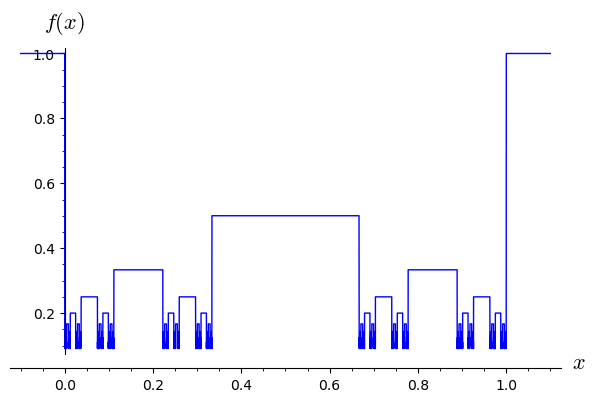

In [12]:
plot(f, xmin=-0.1, xmax=1.1, plot_points=500, axes_labels=['$x$','$f(x)$'])

## The Cantor set as an iterated function system

Let $\Lambda$ denote the set of points $x \in {\mathbb R}$ whose orbit under $T$ is bounded. It should be clear that:
* For all $x \in {\mathbb R}$, $x \in \Lambda$ if and only if $T(x) \in \Lambda$.


Observe that if $y < \frac{3}{2}$, then there are two solutions to the equation
$$T(x)=y.$$
The solutions are 
$$x = g_0(y) = \frac{y}{3} \quad \text{and} \quad x=g_1(y) = 1-\frac{y}{3}.$$

Here we define these inverse branches as Sage functions. 

In [13]:
g0(y) = y/3
g1(y) = 1 - y/3

g0, g1 # The output of the last line is printed.

(y |--> 1/3*y, y |--> -1/3*y + 1)

(Note the change in syntax. The code `g0(y) = y/3` builds a Sage function which can be differentiated, integrated, and printed nicely for example. You could also define $g_0$ by
```python
def g0(y):
    return y/3
```
But, Sage would not be able to symbolic things with this version. We don't actually need these symbolic methods in this notebook, but the Sage syntax is nicer for functions as long as they are just mathematical.)

The two maps
$$\Big\{~g_0(y) = \frac{y}{3}, ~ g_1(y) = 1-\frac{y}{3}~\Big\}.$$
form what is called a *contracting iterated function system* in that each of the finitely many maps is a *contracting similarity*, i.e., the maps satisfy
$$d\big(g_i(x), g_i(y)\big) = c\,d(x,y) \quad \text{for some constant $c<1$}.$$
Here the constant $c$ is $1/3$. See &sect; 4.1 of Edgar for formal definitions.

**Limit sets:** There are various equivalent definitions of the *attractor* (or *limit set* or *invariant set*) of a contracting iterated function system $\{g_0, \ldots, g_{k-1}\}$ in ${\mathbb R}^n$. 

**Definiton 1:** We can find compact subset $K \subset {\mathbb R}^n$ such that $g(K) \subset K$ for every $g$ in the contracting iterated function system. (Proof of this fact is left as an exercise.) The limit set can be defined as 
$$\Lambda = \bigcap_{n=0}^\infty \Lambda_n$$
where $\Lambda_0 = K$ and we define $\Lambda_n$ for $n \geq 0$ inductively according to the rule
$$\Lambda_{n+1} = \bigcup_{i=0}^{k-1} g_i(\Lambda_n).$$

**Remark 1:** For the contracting iterated function system
$$\Big\{~g_0(y) = \frac{y}{3}, ~ g_1(y) = 1-\frac{y}{3}~\Big\},$$
we can take $K = [0, 1]$, since 
$$g_0([0,1])=\left[0,\frac{1}{3}\right] \quad \text{and} \quad g_1([0,1])=\left[\frac{2}{3},1\right].$$

**Remark 2:** The limit set of $\{g_0, g_1\}$ is the same as the set of points with bounded orbits. To see this, observe that when $K=[0,1]$,
$$\Lambda_n = \Big\{x \in {\mathbb R}:~ \{x, T(x), T^2(x), \ldots, T^n(x)\} \subset [0,1]\Big\}.$$
Thus, 
$$\Lambda = \bigcap_{n=0}^\infty \Lambda_n = \{x \in {\mathbb R}:~\text{$T^n(x) \in [0,1]$ for all $n \geq 0$}\}.$$

The following alternate definition is easier for drawing pictures.

**Definiton 2:** Let $G = \{g_0, \ldots, g_{k-1}\}$ be a contracting iterated function system in ${\mathbb R}^n$. Let $x_0 \in {\mathbb R}^n$ be any point. Then we have a natural map from the space of finite words in $\{g_0, \ldots, g_{k-1}\}$ to ${\mathbb R}^n$ by
$$\Phi:(g_{i_0}, g_{i_1}, \ldots, g_{i_j}) \mapsto g_{i_0} \circ g_{i_1} \circ \ldots \circ g_{i_j}(x_0).$$
Here $\Phi$ should be considered to be a map from $\bigcup_{n=0}^\infty G^n$ to ${\mathbb R}^n$. The *limit set* (or *attractor* or *invariant set*) of $G$ is the set of points $z \in {\mathbb R}^n$ such that for any neighborhood $N$ of $z$ there are infinitely many finite words $w$ such that the image $\Phi(w)$ lies in $N$. (That is for, every $\epsilon>0$ there are infinitely words $w$ such that $d\big(z, \Phi(w)\big)<\epsilon$.)

**Remark 3:** The set of finite words $\bigcup_{n=0}^\infty G^n$ and so can be arranged in a sequence $w_j$. Then we may define a sequence in ${\mathbb R}^n$ by $y_j = \Phi(w_j)$. The limit set as defined above is the same as the set of accumulation points (set of subsequential limits or cluser points) of the sequence $y_j$. 

Below we write a function which computes the image of the words of length $n$, 
$\Phi(G^n)$. Observe that $\Phi(G^0)= \{x_0\}$ and 
$$\Phi(G^{n+1}) = g_0\Big(\Phi(G^n)\big) \cup g_1\Big(\Phi(G^n)\big).$$
This allows us to compute 

In [14]:
def compute_phi_image(n, x0):
    leaves = [x0] # Stores G
    for k in range(n):  # Loops through k=0, 1, ..., n-1
        old_leaves = leaves  # Currently stores Phi(G^k)
        leaves = []          # Will store Phi(G^{k+1})
        for x in old_leaves: # Iterate through values in Phi(G^k)
            leaves.append(g0(x)) # Add the two corresponding values
            leaves.append(g1(x)) # to Phi(G^{k+1})
    return leaves

For example, `compute_phi_image(1, 1/2)` will compute the two values which map to $1/2$ under $T$.

In [15]:
values = compute_phi_image(1, 1/2)
values

[1/6, 5/6]

And `compute_phi_image(2, 1/2)` will compute the four values which map to $1/2$ under $T^2$.

In [16]:
values = compute_phi_image(2, 1/2)
values

[1/18, 17/18, 5/18, 13/18]

Now we will use the [point2d](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/point.html#sage.plot.point.point2d) function from Sage to draw the Cantor set.
We will take our $x$ values from `compute_phi_image(10, 1/2)` then assemble a list of points $(x,1)$ and the plot them.

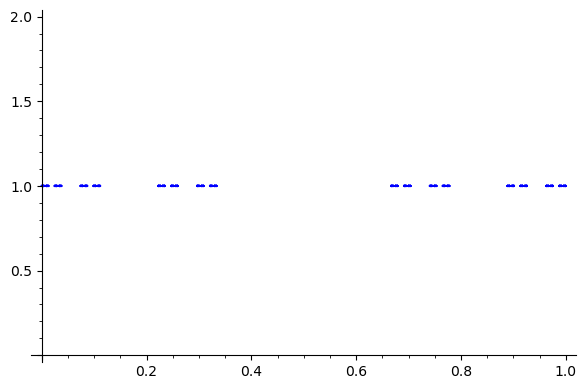

In [17]:
values = compute_phi_image(10, 1/2)
points = []
for x in values:
    points.append( (x, 1) )
point2d(points, marker='.', color='blue')

## Exercises

*For problems 1 and 2 below, you may assume you are working in the metric space ${\mathbb R}^n$ with its usual Euclidean metric.*

**1.** Prove that given a contracting iterated function system $G=\{g_0, g_1, \ldots, g_{k-1}\}$ there is a compact set $K$ such that $g_i(K)$ is a subset of $K$ for all $i$.

**2.** Prove that definition 1 and definition 2 yield the same limit sets. This proof should be independent of:

* The choice of $K$ satisfying $g_i(K) \subset K$ in definition 1. 
* The choice of $x_0$ in definition 2. 

(*Hint:* Given a word $(g_{i_0}, g_{i_1}, \ldots, g_{i_j})$, how far is the set
$$g_{i_0} \circ g_{i_1} \circ \ldots \circ g_{i_j}(K)$$
from the point
$$g_{i_0} \circ g_{i_1} \circ \ldots \circ g_{i_j}(x_0)?)$$

**3.** Find a continuous function $f:{\mathbb R}^2 \to {\mathbb R}^2$ such that the set of points with bounded orbits is exactly the Sierpiński Gasket. The *Sierpiński Gasket* is the limit of a construction depicted below. (This picture is Figure 1.2.1 of Edgar; see Edgar &sect; 1.2 for more details on the gasket.)
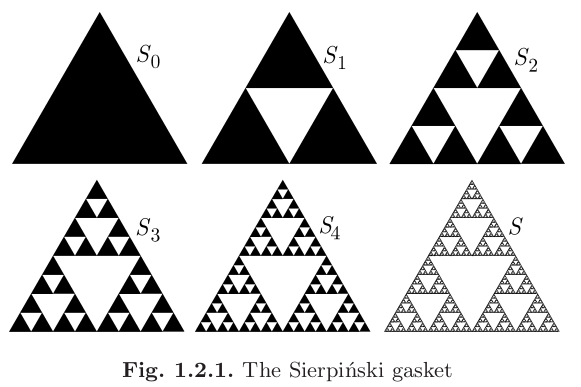

(*Hint:* Try folding up the plane and then scaling.)

**4.** Draw a picture of the Sierpiński Gasket in Sage by plotting images of a single point under an iterated function system yielding the gasket. (*Remarks:* We haven't worked with vectors yet, but some code that playing with vectors is shown below. You can combine ideas demonstrated below with the technique used to plot the Cantor set using definition 2 above to draw the gasket.)

In [18]:
# Define x to be a vector in the plane.
w = vector([1,3])

In [19]:
# Extract the x and y coordinates from a vector
x,y = w
print(f'x={x} and y={y}.')

x=1 and y=3.


In [20]:
# One contraction.
def h0(v):
    return v/2

In [21]:
# Compute h_0(x)
h0(w)

(1/2, 3/2)

In [22]:
# Here we compute an orbit
w0 = vector([3,1])
w = w0
orbit = [w]
for i in range(10):
    w = h0(w)
    orbit.append(w)
orbit

[(3, 1),
 (3/2, 1/2),
 (3/4, 1/4),
 (3/8, 1/8),
 (3/16, 1/16),
 (3/32, 1/32),
 (3/64, 1/64),
 (3/128, 1/128),
 (3/256, 1/256),
 (3/512, 1/512),
 (3/1024, 1/1024)]

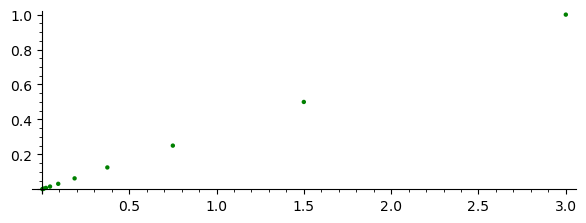

In [23]:
point2d(orbit, marker='o', color='green', aspect_ratio=1)